## Due to the shortness of time on the final presentation day and I was panicking since I have a test after that on that day, I felt like I didn't do the presentation very well T.T

SAD LIFE

### Some of the descriptions of stuff will be in here

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pymunk
import pygame
import random 
import time 

pygame 2.1.0 (SDL 2.0.16, Python 3.7.9)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [9]:
start = time.time()

pygame.init()

# Make a display
display = pygame.display.set_mode((600,600))
# Timer 
clock = pygame.time.Clock()
FPS = 90

coord_x = []
coord_y = []

# make the space
space = pymunk.Space()

class Particles():
    
    # init to make x and y positions 
    def __init__(self, x, y, collision_type):
        # Give it some position
        self.x = x
        self.y = y
        # Give it a body
        self.body = pymunk.Body()
        # Set the position
        self.body.position = x, y
        # Set random velocity
        self.body.velocity = random.uniform(-200,200), random.uniform(-200,200)
        # Set shape circle
        self.shape = pymunk.Circle(self.body, 5)
        # Set density and elasticity for the collision 
        self.shape.density = 1
        self.shape.elasticity = 1 
        # Set the collision type 
        self.shape.collision_type = collision_type
        # Add the body to space 
        space.add(self.body, self.shape)
    
    # draw the particles onto the space 
    def draw(self):
        x, y = self.body.position
        # draw.circle(display, color = some_random_color, position, radius)
        pygame.draw.circle(display, (0, 204, 204), (int(x), int(y)) , 5)
        
class HugeParticle():
    
    # init to make x and y positions 
    def __init__(self, x, y, collision_type):
        # Give it some position
        self.x = x
        self.y = y
        # Give it a body
        self.body = pymunk.Body()
        # Set the position
        self.body.position = x, y
        # Set random velocity
        self.body.velocity = random.uniform(-200,200), random.uniform(-200,200)
        # Set shape circle
        self.shape = pymunk.Circle(self.body, 25)
        # Set density and elasticity for the collision 
        self.shape.density = 1
        self.shape.elasticity = 1 
        # Set the collision type 
        self.shape.collision_type = collision_type
        # Add the body to space 
        space.add(self.body, self.shape)
        
    # draw the particles onto the space 
    def draw(self):
        x, y = self.body.position
        coord_x.append(x)
        coord_y.append(y)
        # draw.circle(display, color = white, position, radius)
        pygame.draw.circle(display, (255, 0, 127), (int(x), int(y)) , 25)
        
class Wall():
    
    def __init__(self, point1, point2):
        self.body = pymunk.Body(body_type = pymunk.Body.STATIC)
        self.shape = pymunk.Segment(self.body, point1, point2, 5)
        self.shape.elasticity = 1
        space.add(self.body, self.shape)
        
def collide(arbiter, space, data):
    return True
        
# Make the display updater and drawer
def BM():
    particles = [Particles(random.randint(0,600), random.randint(0,600), 1) for i in range(800)]
    
    walls = [Wall((0,0), (0,600)), 
             Wall((0,0), (600,0)), 
             Wall((0,600), (600,600)), 
             Wall((600,0), (600,600))]
    
    hugeParticle = HugeParticle(random.randint(0,600), random.randint(0,600), 2)
    
    handler = space.add_collision_handler(1, 2)
    handler.begin = collide
    
    while True:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                return 
        
        # Refill the background color everytime the screen updates
        display.fill((0,0,0))
        [particle.draw() for particle in particles]
        
        hugeParticle.draw()
        
        pygame.display.update()
        clock.tick(FPS)
        space.step(1 / FPS)
        
BM()
pygame.quit() 
end = time.time()

In [10]:
diff = end - start
print(diff)

101.26925683021545


### I said the purple graph below was normal because I pretty much ignored the right side of the graph since, *in my opinion*, was small enough to be considered negligible. But a Poission distribution does make more sense -> since when I tried to run the simulation for much longer, there are more significant values towards the right hand side of the histogram.

### I did ran this simulation again after the presentation, so the result seen here will not be the same as what is shown in the slides 

Mean value of distance between each collision =  0.3398210654369 in god knows what unit this is
mean value plotted in yellow on the purple graph


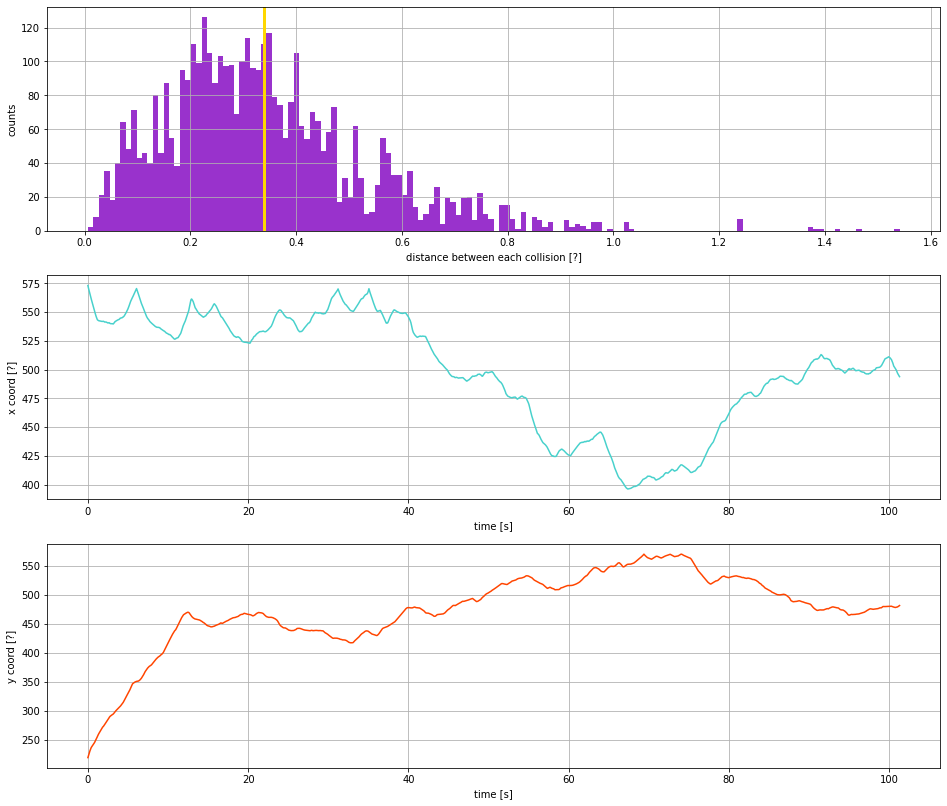

In [12]:
distance = np.array([])

for i in range(len(coord_x) - 1):
    x = coord_x[i+1] - coord_x[i]
    y = coord_y[i+1] - coord_y[i]
    distance = np.append(distance, np.sqrt(x**2 + y**2))

t = np.linspace(0, diff, len(coord_x)-1)

mean = sum(distance) / len(distance)
print('Mean value of distance between each collision = ', mean, 'in god knows what unit this is')

fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.set_figheight(14)
fig.set_figwidth(16)
ax1.grid()
ax1.set_ylabel('counts')
ax1.set_xlabel('distance between each collision [?]')
ax1.hist(distance,bins = 150, color = 'darkorchid')
ax1.axvline(x = mean, color = 'gold', linewidth = 3)

ax2.grid()
ax2.set_xlabel('time [s]')
ax2.set_ylabel('x coord [?]')
ax2.plot(t, coord_x[:-1], color = 'mediumturquoise')

ax3.grid()
ax3.set_xlabel('time [s]')
ax3.set_ylabel('y coord [?]')
ax3.plot(t, 600 - np.array(coord_y[:-1]), color = 'orangered')
# plt.scatter(t, distance, color = 'red', marker = '+')
print('mean value plotted in yellow on the purple graph')

## Mean Free Path (2D)

1. The particle will collide with any particle in the area $2dl$, if the particle has travelled length $l$

2. Let $\bar{v}$ be the average speed of the particles in the area. Other particles will have avg speed = $\sqrt{2}\bar{v}$ viewed from the frame of the particle of interest

3. Area swept by all $N$ other particles in that area is $2\sqrt{2}\frac{N}{A}d\bar{v}\Delta t$, in time $\Delta t$

4. MFP = $\frac{\bar{v}\Delta t}{2\sqrt{2}\frac{N}{A}d \bar{v}\Delta t} = \frac{A}{2\sqrt{2}Nd}$

### ^ Useless, scratch it =.=

## Side Project

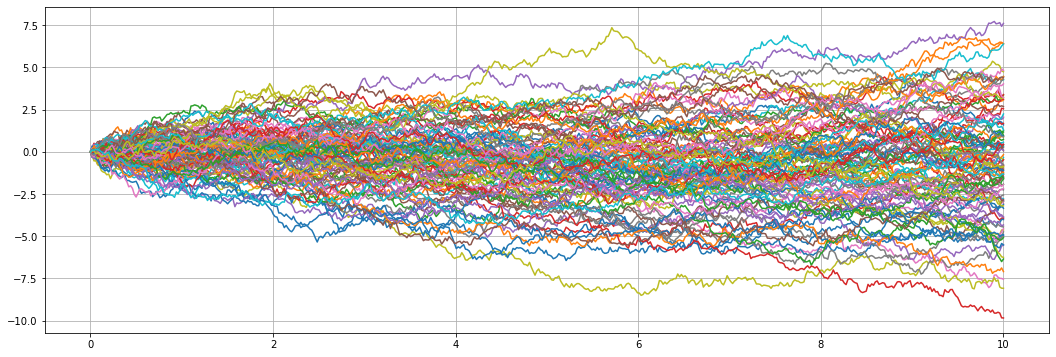

In [13]:
# n = number of sample points
n = 500
# T = time 
T = 10.
# times = list of time steps 
times = np.linspace(0, T, n)
# dt = time step
dt = times[1] - times[0]
# number of samples 
d = 100
# B0 = initial values of brownian motion (starting point)
B0 = np.zeros(shape = (1,  d))
# dB = difference between the values of brownian motion
# sqrt(dt) for normalising / scaling the values 
dB = np.sqrt(dt) * np.random.normal(size = (n-1, d))
# initial values of brownian motion + cumulative sum of each BM increments
B = np.concatenate((B0, np.cumsum(dB, axis = 0)), axis = 0)
plt.figure(figsize = (18,6))
plt.grid()
plt.plot(times, B)
plt.show()
    

### ^ The graph above is what I wanted to recreate, which is done very easily

## Now, the process of breaking it 

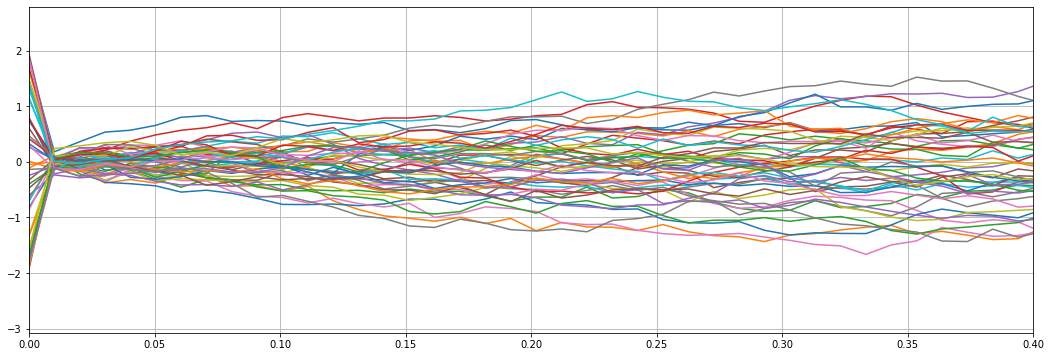

In [17]:
# n = number of sample points
n = 100
# T = time 
T = 1.
# times = list of time steps 
times = np.linspace(0, T, n)
# dt = time step
dt = times[1] - times[0]
# number of samples 
d = 50
# B0 = initial values of brownian motion path (starting point)
B0 = np.zeros(shape = (1,  d))
for i in range(len(B0[0])):
    B0[0][i] = np.random.uniform(-2*T, 2*T)# dB = difference between the values of brownian motion
# sqrt(dt) for normalising / scaling the values 
dB = np.sqrt(dt) * np.random.normal(size = (n-1, d))
# dB = np.random.normal(size = (n-1, d))
# initial values of brownian motion + cumulative sum of each BM increments
B = np.concatenate((B0, np.cumsum(dB, axis = 0)), axis = 0)
plt.figure(figsize = (18,6))
plt.grid()
plt.plot(times, B)
plt.xlim(0,0.4)
plt.show()
    

### ^ I think the reason why the above graph didn't break is because of the dB values. Somehow in brought all the values of graph back to ~ 0 again since the very beginning and then it followed the same patter as the previos graph

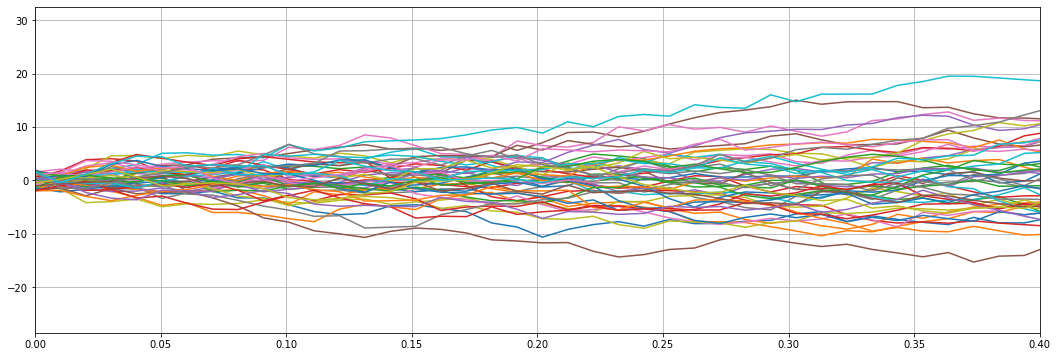

In [15]:
# n = number of sample points
n = 100
# T = time 
T = 1.
# times = list of time steps 
times = np.linspace(0, T, n)
# dt = time step
dt = times[1] - times[0]
# number of samples 
d = 50
# B0 = initial values of brownian motion path (starting point)
B0 = np.zeros(shape = (1,  d))
for i in range(len(B0[0])):
    B0[0][i] = np.random.uniform(-2*T, 2*T)# dB = difference between the values of brownian motion
# sqrt(dt) for normalising / scaling the values 
# dB = np.sqrt(dt) * np.random.normal(size = (n-1, d))
dB = np.random.normal(size = (n-1, d))
# initial values of brownian motion + cumulative sum of each BM increments
B = np.concatenate((B0, np.cumsum(dB, axis = 0)), axis = 0)
plt.figure(figsize = (18,6))
plt.grid()
plt.plot(times, B)
plt.xlim(0,0.4)
plt.show()
    

### ^ After removing the scaling factor, I still could not do anything to break the pattern of this 

### I'm trying a few more things down here after the presentation since I don't wanna give up on trying to break this 

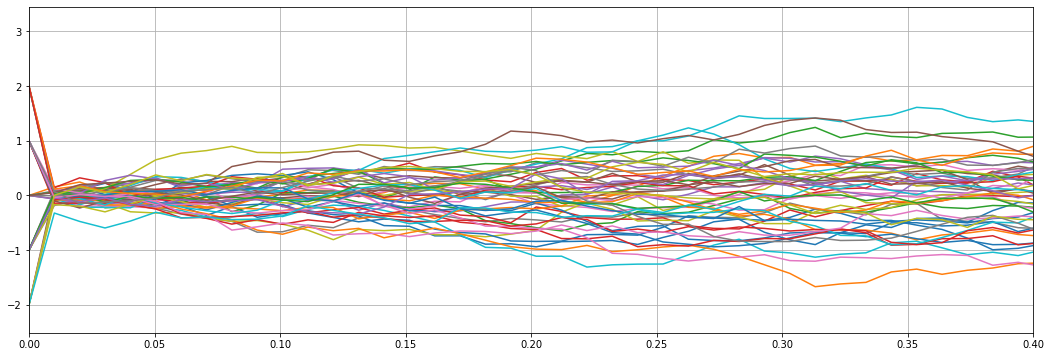

In [20]:
# n = number of sample points
n = 100
# T = time 
T = 1.
# times = list of time steps 
times = np.linspace(0, T, n)
# dt = time step
dt = times[1] - times[0]
# number of samples 
d = 50
# B0 = initial values of brownian motion path (starting point)
B0 = np.zeros(shape = (1,  d))
for i in range(len(B0[0])):
    B0[0][i] = np.random.randint(-2*T, 2*T+1)# dB = difference between the values of brownian motion
# sqrt(dt) for normalising / scaling the values 
dB = np.sqrt(dt) * np.random.normal(size = (n-1, d))
# dB = np.random.normal(size = (n-1, d))
# initial values of brownian motion + cumulative sum of each BM increments
B = np.concatenate((B0, np.cumsum(dB, axis = 0)), axis = 0)
plt.figure(figsize = (18,6))
plt.grid()
plt.plot(times, B)
plt.xlim(0,0.4)
plt.show()
    

### ^ Even after changing random.uniform to random.randint =.=

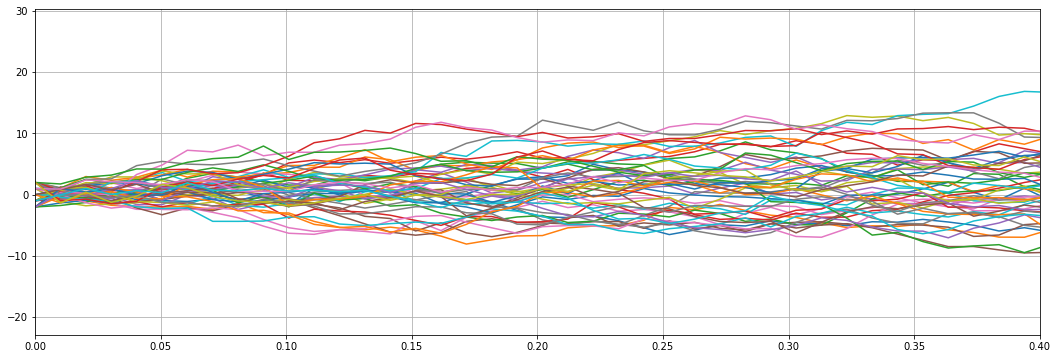

In [21]:
# n = number of sample points
n = 100
# T = time 
T = 1.
# times = list of time steps 
times = np.linspace(0, T, n)
# dt = time step
dt = times[1] - times[0]
# number of samples 
d = 50
# B0 = initial values of brownian motion path (starting point)
B0 = np.zeros(shape = (1,  d))
for i in range(len(B0[0])):
    B0[0][i] = np.random.randint(-2*T, 2*T+1)# dB = difference between the values of brownian motion
# sqrt(dt) for normalising / scaling the values 
# dB = np.sqrt(dt) * np.random.normal(size = (n-1, d))
dB = np.random.normal(size = (n-1, d))
# initial values of brownian motion + cumulative sum of each BM increments
B = np.concatenate((B0, np.cumsum(dB, axis = 0)), axis = 0)
plt.figure(figsize = (18,6))
plt.grid()
plt.plot(times, B)
plt.xlim(0,0.4)
plt.show()
    

### ^ random.randint + removing the scaling factor

## Conclusion, as far as I've done, not possible to break it, it will always fall back to the same pattern. You one little stubborn brownian motion 555